# <font color=Crimson size=6 face="宋体" align="center">k均值聚类算法（k-means clustering algorithm）</font>     
--------------

[KMEANS交互可視化](https://www.naftaliharris.com/blog/visualizing-k-means-clustering/)

kmeans算法是无监督的聚类算法

以二维模拟样本为例，使用Kmeans算法聚类

In [1]:
from __future__ import print_function

import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import TABLEAU_COLORS

from IPython.display import display
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interactive_output
import pylab

import os

from dataset_producer import Dataset, rand_uniform_data
from kmeans_algo import kmeans, randCentroids

FIG_SIZE = (8, 8)
pylab.rcParams['figure.figsize'] = FIG_SIZE
TEMP_FILE = 'tempSet.txt'

## 导入原始数据(import the dataset)
TODO:
添加样本点更多、数据分布不同的数据集

In [2]:
#数据集存放位置
DATA_DIR = "testdata/"
all_data_path = []
for root, dirs, files in os.walk(DATA_DIR):
    for file in files:
        all_data_path.append(os.path.join(root, file))

#可交互文件选择模块
iw_filename = widgets.Dropdown(options=all_data_path, description='选择原有数据集（生成的数据集为%s）:' % TEMP_FILE)
w_gen_button = widgets.Button(description='生成随机数据集')
w_output = widgets.Output()
w_draw_output = widgets.Output()
w_rand_size = widgets.IntSlider(value=100, min=10, max=2000, description='生成数据个数')

new_dataset = Dataset()


def gen_rand_data(b):
    """
    点击按钮生成随机数据集，写入testdata，并展示
    :param b:按钮控件
    :return:
    """
    %matplotlib inline
    global new_dataset
    new_dataset = rand_uniform_data(n=w_rand_size.value, d=2)
    new_dataset.path = 'testdata/' + TEMP_FILE
    new_dataset.write_data()
    with w_output:
        w_output.clear_output(wait=True)
        new_dataset.show_data()
    with w_draw_output:
        w_draw_output.clear_output(wait=True)
        new_dataset.draw_2D_data()
        plt.show()  #不加这个会导致多张图片生成


def choose_show(filename):
    """
    选择原有数据集，展示原始数据
    :param filename: 文件路径
    :return:
    """
    %matplotlib inline
    global new_dataset

    new_dataset = Dataset(path=filename)
    with w_output:
        w_output.clear_output(wait=True)
        new_dataset.show_data()
    with w_draw_output:
        w_draw_output.clear_output(wait=True)
        new_dataset.draw_2D_data()
        plt.show()


w_gen_button.on_click(gen_rand_data)
a = interactive(choose_show, filename=all_data_path)
# 控件排版
widgets.VBox([w_rand_size, w_gen_button, a, widgets.HBox([w_draw_output, w_output])])

Kmeans算法

初始化聚类中心

TODO:
1.更新K值全部初始化中心点
2.按钮添加一个随机中心点
3.输入坐标添加中心点

IntSlider(value=0, description='K', max=10)

Button(description='生成中心点', style=ButtonStyle())

Output()

<IPython.core.display.Javascript object>


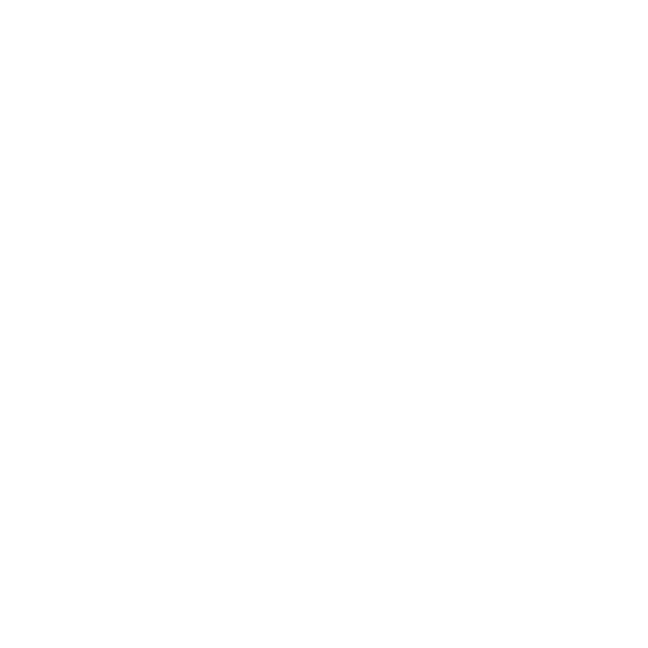

<IPython.core.display.Javascript object>


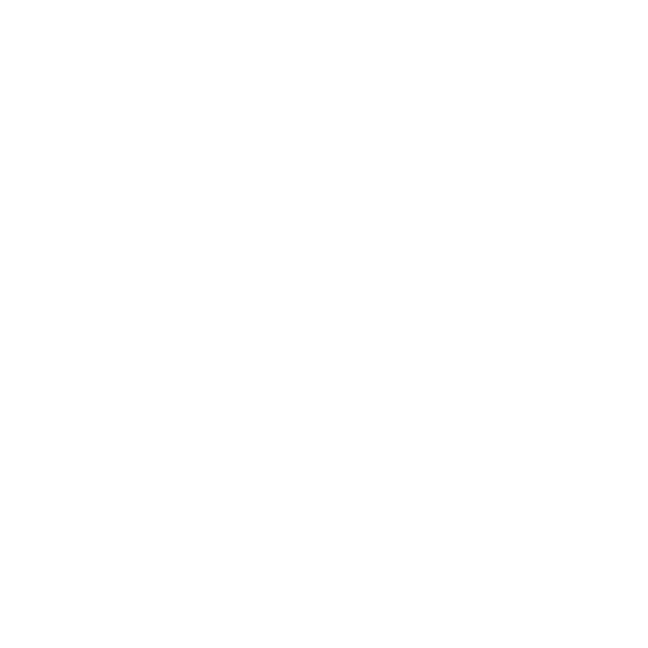

In [3]:
%matplotlib notebook
centroids: np.ndarray = None

w_centroids_button = widgets.Button(description='生成中心点')
K_widget = widgets.IntSlider(value=0, min=0, max=10, step=1, description='K')
centroid_output = widgets.Output()

def centroids_show(b):

    %matplotlib notebook
    global centroids
    centroids = randCentroids(x=new_dataset.data, k=K_widget.value)

    def onclick(event):
        """
        matplotlib图片点击事件
        """
        global centroids
        ax.plot(event.xdata, event.ydata, 'ro', linewidth=20)
        #全局变量记录下鼠标点击的位置
        centroids = np.append(centroids, [[event.xdata, event.ydata]], axis=0)
        tx = 'xdata=%f, ydata=%f, k=%d' % (event.xdata, event.ydata, centroids.shape[0])
        text.set_text(tx)

    with centroid_output:
        centroid_output.clear_output()
        print("中心点的坐标是\n", centroids)
        fig, ax = new_dataset.draw_2D_data()
        ax.scatter(centroids[:, 0], centroids[:, 1], c='r')
        text = fig.text(0, 0.9, "", va="bottom", ha="left", fontsize=17)
        cid = fig.canvas.mpl_connect('button_press_event', onclick)


w_centroids_button.on_click(centroids_show)
display(K_widget, w_centroids_button, centroid_output)

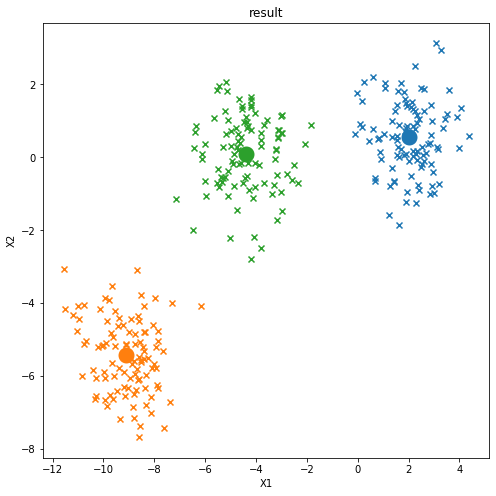

In [5]:
%matplotlib inline
pylab.rcParams['figure.figsize'] = FIG_SIZE
info_list = kmeans(data=new_dataset.data, centroids=centroids)

for i in range(centroids.shape[0]):
    clst = new_dataset.data[np.where(info_list[-1].clstAss[:, 0].ravel() == i)]
    plt.scatter(clst[:, 0], clst[:, 1], marker='x', c=list(TABLEAU_COLORS)[i])
    plt.scatter(info_list[-1].cent[i, 0], info_list[-1].cent[i, 1],
                marker='o', c=list(TABLEAU_COLORS)[i],linewidths=10)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title("result")
plt.show()

In [9]:
def processing_display(n):
    n -= 1
    process = '分配样本' if n % 2 == 0 else '重新计算中心'

    #对于每个类别分别绘制
    for i in range(centroids.shape[0]):
        clst = new_dataset.data[np.where(info_list[n].clstAss[:, 0].ravel() == i)]
        #绘制第i个类别的样本
        plt.scatter(clst[:, 0], clst[:, 1], marker='x', c=list(TABLEAU_COLORS)[i])
        #绘制第i个类别的中心
        plt.scatter(info_list[n].cent[i, 0], info_list[n].cent[i, 1],
                    marker='o', c=list(TABLEAU_COLORS)[i],linewidths=10)
        #绘制第i个中心的轨迹
        x=[info_list[j].cent[i,0] for j in range(n+1)]
        y=[info_list[j].cent[i,1] for j in range(n+1)]
        plt.plot(x,y,"b-o",c=list(TABLEAU_COLORS)[i])
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.rcParams['font.sans-serif'] = ['KaiTi']  #中文标题
    plt.rcParams['axes.unicode_minus'] = False  #坐标负号不显示bug
    plt.title("第%d轮迭代，%s的结果" % ((n // 2 + 1), process), fontsize=17)
    with media_out:
        media_out.clear_output()
        plt.show()


media_out = widgets.Output()
n_widget = widgets.IntSlider(min=1, max=len(info_list), description='',
                             continuous_update=False)
play_widget = widgets.Play(interval=5000,value=1,min=1,max=len(info_list),step=1,
                           description="Press play",disabled=False)

widgets.jslink((play_widget, 'value'), (n_widget, 'value'))
b = interactive(processing_display, n=n_widget)
display(play_widget, b, media_out)

Play(value=1, description='Press play', interval=5000, max=16, min=1)

interactive(children=(IntSlider(value=1, continuous_update=False, description='n', max=16, min=1), Output()), …

Output()

Kmeans算法的局限性

TODO:
1.依赖初始聚类中心
2.K值的选择
3.适用的数据类型